In [86]:
import sympy as sym
import numpy as np

from sympy import Symbol, Function, Eq
from sympy import diff
from sympy.abc import t, x, theta, omega, alpha

from scipy.integrate import quad, solve_ivp

In [40]:
from math import pi

In [42]:
g = Symbol('g', positive=True)
l = Symbol('l', positive=True)

In [66]:
angle = Function('theta')
velocity = diff(angle(t), t, 1)
acceleration = diff(angle(t), t, 2)

In [90]:
equation = acceleration + (g / l) * sym.sin(angle(t))
equation

g*sin(theta(t))/l + Derivative(theta(t), (t, 2))

In [93]:
equation = equation.subs({ angle(t): theta, velocity: omega, acceleration: alpha })
equation

alpha + g*sin(theta)/l

In [96]:
expression = sym.solve(equation, alpha)[0]
expression

-g*sin(theta)/l

In [105]:
ode_base = sym.lambdify([theta, omega, l, g], expression, modules=['scipy', 'numpy'])

In [106]:
ode_base(1, 1, 2.0, 9.81)

-4.127415180482733

In [136]:
def ode(l: float):
    g = 9.81
    return lambda t, x: np.array([x[1], ode_base(x[0], x[1], l, g)])

In [138]:
ode(2.0)(0.0, [1.0, 1.0])

array([ 1.        , -4.12741518])

In [164]:
def period(t0: float, l: float):
    g = 9.81
    I, _ = quad(lambda x: 1 / np.sqrt(np.cos(x) - np.cos(t0)), 0, t0)
    return 4.0 * np.sqrt(l / (2 * g)) * I

In [175]:
l = 2.0
t0, o0 = 1.0, 0.0

f = ode(l)
t = np.linspace(0, period(t0, l) / 2, 200)

In [176]:
sol = solve_ivp(f, t_span=[t[0], t[-1]], y0=[t0, o0], t_eval=t)

In [177]:
sol.y[0]

array([ 1.        ,  0.99988077,  0.9995231 ,  0.99892704,  0.99809272,
        0.99702041,  0.99571024,  0.99416238,  0.992377  ,  0.99035435,
        0.9880947 ,  0.98559838,  0.98286575,  0.97989723,  0.97669327,
        0.97325439,  0.96958112,  0.96567405,  0.96153383,  0.95716113,
        0.95255668,  0.94772125,  0.94265564,  0.93736073,  0.93183741,
        0.92608662,  0.92010937,  0.91390669,  0.90747966,  0.90082941,
        0.8939571 ,  0.88686395,  0.87955123,  0.87202022,  0.86427229,
        0.85630883,  0.84813144,  0.83974221,  0.83114272,  0.82233453,
        0.81331925,  0.80409857,  0.79467424,  0.78504806,  0.77522191,
        0.76519772,  0.75497747,  0.74456322,  0.73395708,  0.72316124,
        0.71217794,  0.70100946,  0.68965818,  0.67812651,  0.66641695,
        0.65453203,  0.64247437,  0.63024663,  0.61785155,  0.60529193,
        0.5925706 ,  0.57969049,  0.56665459,  0.55346591,  0.54012758,
        0.52664274,  0.51301462,  0.49924652,  0.48534177,  0.47

In [156]:
import matplotlib.pyplot as plt

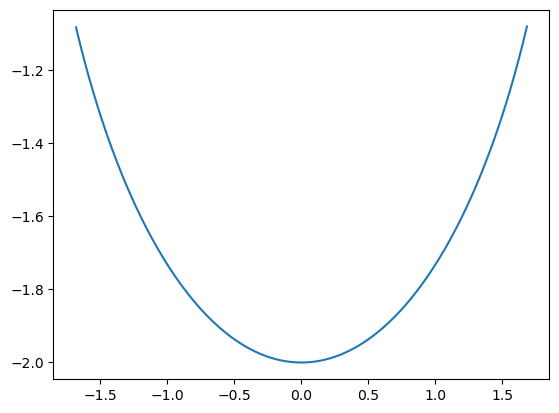

In [178]:
plt.plot(l * np.sin(sol.y[0]), -l * np.cos(sol.y[0]))